# Exercise 08.1-2
The following graphs are produced with the parameters found with the variational Monte Carlo method.
The methods for finding minima is quite simple: sigma and mu are changed in a range by finite steps. When the couple that minimize the problem is found, then a new cycle is done in a range that is 10 times smaller (and same is for steps); then a third iteration with the same tecnique is done. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

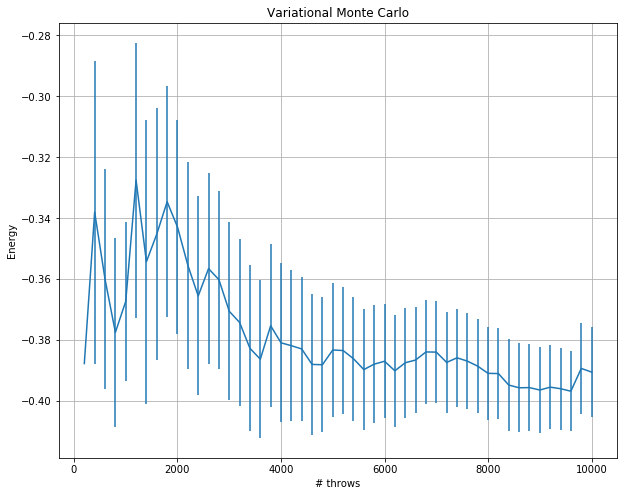

In [2]:
n, integral, error = np.loadtxt("ex08.1-2/integral.txt", delimiter="\t", unpack=True)
plt.figure(figsize=(10,8))

#I have plotted a function of number of throws, not blocks
plt.errorbar(n,integral,yerr=error)

plt.grid(True)
plt.xlabel("# throws")
plt.ylabel("Energy" )
plt.title("Variational Monte Carlo")
plt.show()

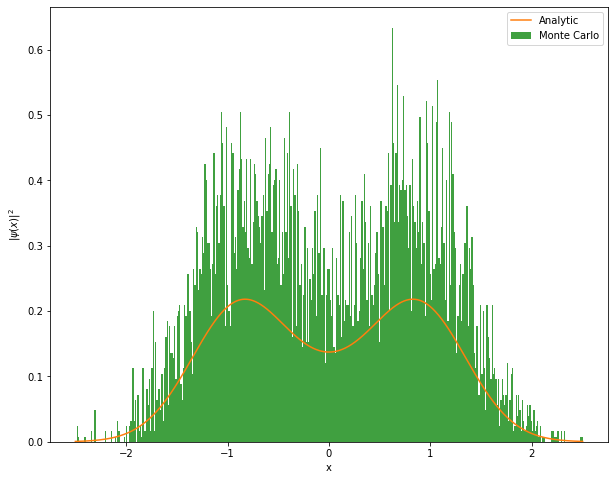

In [3]:
def psi2(x, mu, sigma):
    y= np.power(np.exp(-(x-mu)*(x-mu)/(sigma*sigma*2.))+np.exp(-(x+mu)*(x+mu)/(sigma*sigma*2.)),2)
    return y/(2.*sigma*np.pi*(1+np.exp(-mu*mu/(sigma*sigma))))

psi= np.loadtxt("ex08.1-2/psi2.txt",)
plt.figure(figsize=(10,8))
x=np.linspace(-2.5,2.5,1000)
plt.hist(psi, 400, density=True,facecolor='g', alpha=0.75, label="Monte Carlo")
#plt.plot(x_lin,psi_teo[0]**2, label="Analytic")
plt.plot(x,psi2(x, 0.8888, 0.6648), label="Analytic")
plt.legend()
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$" )
plt.show()

# Exercise 08.3

In [4]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 6
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
psi_teo=psi

In [5]:
x_const, psi_const, err_psi_const = np.loadtxt("ex08.3/QMC_1D_const/probability.dat", unpack = 'true')
x, psi, err_psi = np.loadtxt("ex08.3/QMC_1D_trial/probability.dat", unpack = 'true')

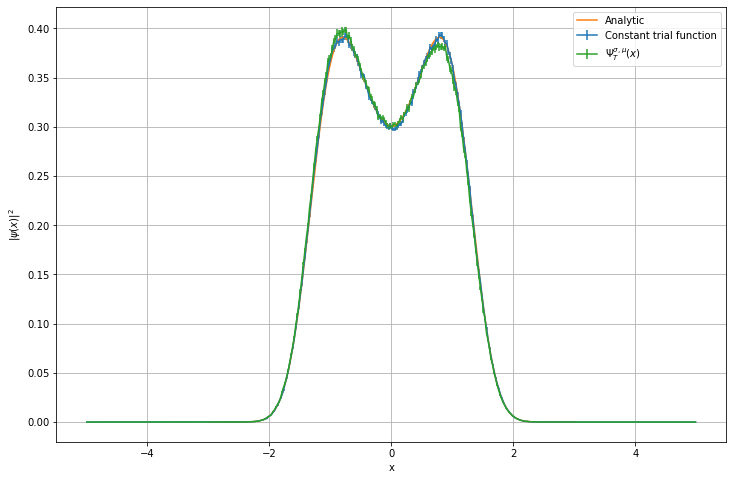

In [6]:
plt.figure(figsize=(12,8));
plt.errorbar(x_const, psi_const, yerr=err_psi_const, label='Constant trial function');
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$" )
x_lin= np.linspace(-3, 3, 1000)
plt.plot(x_lin,psi_teo[0]**2, label="Analytic")
plt.errorbar(x, psi, yerr=err_psi, label="$\Psi_T^{\sigma,\mu}(x)$");
plt.legend();


Reduced imaginary part

In [7]:
x, psi_reduced, err_psi_reduced = np.loadtxt("ex08.3/QMC_1D_reduced/probability.dat", unpack = 'true')

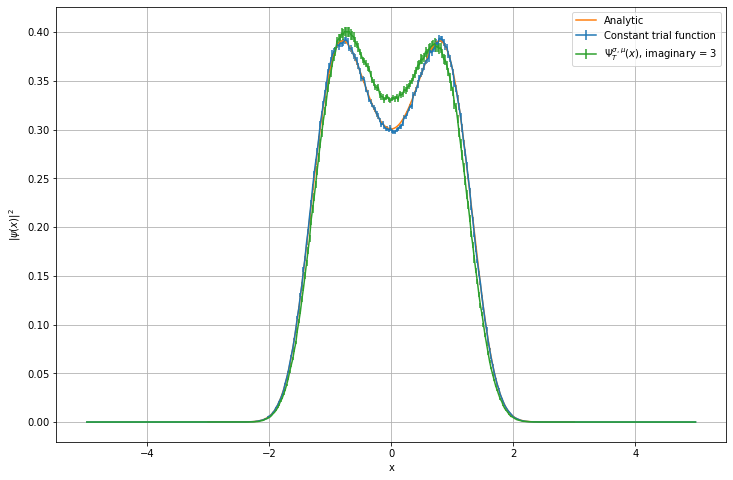

In [8]:
plt.figure(figsize=(12,8));
plt.errorbar(x_const, psi_const, yerr=err_psi_const, label='Constant trial function');
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$" )
x_lin= np.linspace(-3, 3, 1000)
plt.plot(x_lin,psi_teo[0]**2, label="Analytic")
plt.errorbar(x, psi_reduced, yerr=err_psi_reduced, label="$\Psi_T^{\sigma,\mu}(x)$, imaginary = 3");
plt.legend();

In the graph above, I have reduced the imaginary part to 3 and differences start to be evident. With imaginary part equal to 2 the graph starts to be completely wrong.

PIMC with T > 0

In [9]:
x, pimc, err_pimc = np.loadtxt("ex08.3/PIMC/probability.dat", unpack = 'true')

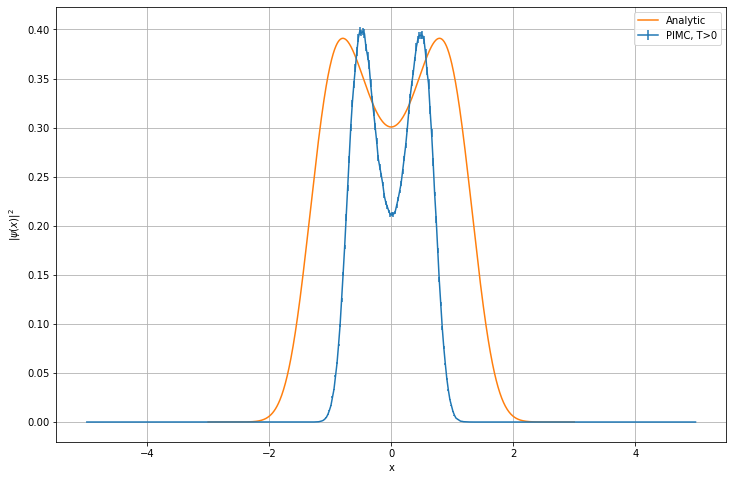

In [10]:
plt.figure(figsize=(12,8));
plt.errorbar(x_const, pimc, yerr=err_pimc, label='PIMC, T>0');
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$" )
x_lin= np.linspace(-3, 3, 1000)
plt.plot(x_lin,psi_teo[0]**2, label="Analytic")
plt.legend();